In [153]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [154]:
# Inlezen van CSV-bestand
dataPositions = pd.read_csv('../data-train-sin/positions_xyz_128px_2024-03-05_full.csv')
dataCoordinates = pd.read_csv('../data-train-sin/red_ball_coordinates_128px_2024-03-05_full.csv')
dataPositions.shape, dataCoordinates.shape

((10543, 3), (10543, 14))

In [155]:
combined = pd.concat([dataCoordinates, dataPositions], axis=1)
combined = combined.dropna()
combined = combined[:1000]

In [156]:
X = combined.iloc[:, :14] # select all rows and columns from 0 to 13
y = combined.iloc[:, 14:] # select x y z output columns

### Splitting the dataset into the Training set and Test set

In [157]:
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

### Hyperparameter tuning

In [158]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor

# Define a parameter grid for the MLPRegressor
param_grid = {
    'model__hidden_layer_sizes': [(100,), (150,), (200,)],
    'model__activation': ['identity', 'logistic', 'relu'],
    'model__solver': ['adam'],
    'model__learning_rate': ['constant', 'adaptive'],
    'model__learning_rate_init': [0.0001, 0.001, 0.01],
    'model__max_iter': [20000, 30000, 40000],
    'model__early_stopping': [True],
}

# Create a pipeline with an MLPRegressor model
pipeline = Pipeline([
    ('model', MLPRegressor(random_state=42))
])
#model = MLPRegressor(solver='adam', max_iter=20000, learning_rate_init=0.001, learning_rate='adaptive', hidden_layer_sizes=(150,), early_stopping=True, activation='relu', random_state=42)


random_search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

#### Train the model

In [159]:
random_search.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('model',
                                              MLPRegressor(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__activation': ['identity',
                                                              'logistic',
                                                              'relu'],
                                        'model__early_stopping': [True],
                                        'model__hidden_layer_sizes': [(50,),
                                                                      (100,),
                                                                      (150,),
                                                                      (200,)],
                                        'model__learning_rate': ['constant',
                                                                 'adaptive'],
                                        'model__learning_rate_init': [0.0001,
                                                                      0.001,
                                                                      0.01],
                                        'model__max_iter': [20000, 30000,
                                                            40000],
                                        'model__solver': ['adam']},
                   random_state=42, verbose=2)

#### Result of the hyperparameter tuning

In [160]:
model = random_search.best_estimator_

In [161]:
print('fBest parameters found:\n', random_search.best_params_)

fBest parameters found:
 {'model__solver': 'adam', 'model__max_iter': 20000, 'model__learning_rate_init': 0.01, 'model__learning_rate': 'adaptive', 'model__hidden_layer_sizes': (200,), 'model__early_stopping': True, 'model__activation': 'relu'}


In [172]:
mlp_model = MLPRegressor(random_search.best_params_, random_state=42)

In [ ]:
mlp_model.fit(X, y)

## Make Predictions on new data

In [162]:
test_data = pd.read_csv('../data-test-sin/red_ball_coordinates_2024-03-05_12h01m.csv', delimiter=',', decimal='.')
test_result = pd.read_csv('../data-test-sin/positions_xyz_2024-03-05_12h01m.csv', delimiter=',', decimal='.')

In [163]:
new_combined = pd.concat([test_data, test_result], axis=1)
new_combined = new_combined.dropna()
new_combined

,u0,v0,u1,v1,u2,v2,u3,v3,u4,v4,u5,v5,u6,v6,x,y,z
0,86.166667,98.333333,86.285714,76.000000,42.400000,75.800000,44.000000,54.142857,42.800000,98.600000,44.125000,73.250000,76.727273,52.363636,8.320000,3.640000,22.29200
1,85.000000,99.500000,86.500000,76.000000,42.333333,76.000000,43.000000,55.200000,42.400000,99.200000,48.714286,74.285714,73.888889,52.444444,8.320000,3.640000,25.29200
2,85.000000,99.500000,85.500000,77.500000,40.666667,77.666667,43.000000,55.000000,42.000000,99.800000,48.714286,74.285714,72.375000,52.375000,8.320000,3.640000,25.29200
3,84.500000,100.500000,84.666667,77.666667,40.500000,77.500000,42.333333,55.666667,41.200000,100.400000,51.555556,75.222222,70.714286,52.142857,8.320000,3.640000,25.29200
4,83.500000,101.000000,84.666667,78.333333,40.000000,78.000000,42.500000,56.000000,40.500000,101.500000,36.250000,73.750000,60.250000,50.250000,8.419981,3.739982,25.28940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1403,65.600000,106.100000,80.000000,86.285714,34.285714,87.000000,36.500000,64.000000,34.875000,111.125000,38.600000,80.200000,72.625000,61.250000,9.644371,4.964371,21.65526
1404,66.100000,105.600000,80.500000,86.000000,34.875000,86.125000,37.000000,63.500000,35.000000,110.800000,40.636364,80.545455,69.800000,59.600000,9.553925,4.873925,21.53371
1405,69.333333,105.583333,82.000000,84.714286,36.125000,85.125000,38.500000,62.500000,36.888889,109.666667,42.833333,80.416667,74.375000,60.000000,9.462097,4.782098,21.41344
1406,65.333333,104.888889,81.000000,85.285714,35.750000,85.750000,37.875000,63.125000,36.000000,110.000000,39.200000,79.600000,74.222222,60.777778,9.369012,4.689012,21.29473


In [164]:
new_X = new_combined.iloc[:, :14]
new_y = new_combined.iloc[:, 14:]
new_X.shape, new_y.shape

((1358, 14), (1358, 3))

In [165]:
new_y

,x,y,z
0,8.320000,3.640000,22.29200
1,8.320000,3.640000,25.29200
2,8.320000,3.640000,25.29200
3,8.320000,3.640000,25.29200
4,8.419981,3.739982,25.28940
...,...,...,...
1403,9.644371,4.964371,21.65526
1404,9.553925,4.873925,21.53371
1405,9.462097,4.782098,21.41344
1406,9.369012,4.689012,21.29473


In [166]:
new_X_scaled = scaler_X.transform(new_X)
new_y_scaled = scaler_y.transform(new_y)

In [167]:
new_y_pred_scaled = mlp_model.predict(new_X_scaled)
new_y_pred_scaled

array([[-0.12819778, -0.25493581,  0.04808172],
       [-0.10711605, -0.22584632,  0.10698597],
       [-0.07036719, -0.18739916,  0.17852868],
       ...,
       [ 0.30384244,  0.35294639,  0.93959336],
       [ 0.37284837,  0.37307966,  0.96664928],
       [ 0.25909718,  0.31229863,  0.88229224]])

In [168]:
new_y_pred = scaler_y.inverse_transform(new_y_pred_scaled)

In [169]:
new_y_pred

array([[ 6.95231585,  2.88924059, 22.51633489],
       [ 6.99676818,  2.95116925, 22.64173622],
       [ 7.07425579,  3.03301946, 22.79404357],
       ...,
       [ 7.86330353,  4.18336183, 24.41427505],
       [ 8.00880746,  4.22622359, 24.47187443],
       [ 7.76895494,  4.09682676, 24.29228664]])

In [170]:
from utils.evaluate import evaluate_model

new_mse, new_mae, new_r2 = evaluate_model(new_y, new_y_pred, "New Data")

Mean Squared Error on New Data Set: 4.838539371221404
Mean Absolute Error on New Data Set: 1.4997615947661107
R2 Score on New Data set: -0.11804516195664554


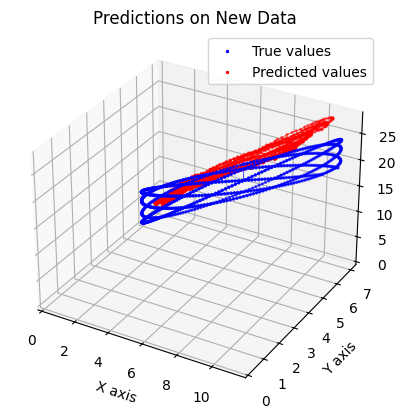

In [171]:
from utils.plot_maker import plot_maker_3d

plot_maker_3d(np.array(new_y), np.array(new_y_pred), "Predictions on New Data")